<a href="https://colab.research.google.com/github/prudvireddy3/customer-churn-prediction-2/blob/main/Customer_Churn_Prediction_Using_Machine_Learning_(1)_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data =pd.read_csv("Churn (1) (1).csv")

# Exploratory Data Analysis (EDA):

In [3]:
data.columns

Index(['Unnamed: 0', 'state', 'area.code', 'account.length', 'voice.plan',
       'voice.messages', 'intl.plan', 'intl.mins', 'intl.calls', 'intl.charge',
       'day.mins', 'day.calls', 'day.charge', 'eve.mins', 'eve.calls',
       'eve.charge', 'night.mins', 'night.calls', 'night.charge',
       'customer.calls', 'churn'],
      dtype='object')

In [4]:
data.drop('Unnamed: 0',axis=1,inplace = True)

In [5]:
data

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,KS,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,OH,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,NJ,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,OH,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,OK,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,area_code_408,50,yes,40,no,9.9,5,2.67,235.7,127,40.07,223,126,18.96,297.5,116,13.39,2,no
4996,WV,area_code_415,152,no,0,no,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4997,DC,area_code_415,61,no,0,no,13.6,4,3.67,140.6,89,23.9,172.8,128,14.69,212.4,97,9.56,1,no
4998,DC,area_code_510,109,no,0,no,8.5,6,2.30,188.8,67,32.1,171.7,92,14.59,224.4,89,10.10,0,no


In [6]:
data['day.charge']=data['day.charge'].astype(float)
data['eve.mins']=data['eve.mins'].astype(float)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           5000 non-null   object 
 1   area.code       5000 non-null   object 
 2   account.length  5000 non-null   int64  
 3   voice.plan      5000 non-null   object 
 4   voice.messages  5000 non-null   int64  
 5   intl.plan       5000 non-null   object 
 6   intl.mins       5000 non-null   float64
 7   intl.calls      5000 non-null   int64  
 8   intl.charge     5000 non-null   float64
 9   day.mins        5000 non-null   float64
 10  day.calls       5000 non-null   int64  
 11  day.charge      4993 non-null   float64
 12  eve.mins        4976 non-null   float64
 13  eve.calls       5000 non-null   int64  
 14  eve.charge      5000 non-null   float64
 15  night.mins      5000 non-null   float64
 16  night.calls     5000 non-null   int64  
 17  night.charge    5000 non-null   f

In [8]:
data['voice.plan'] = data['voice.plan'].map({'no': 0, 'yes': 1})
data['intl.plan'] = data['intl.plan'].map({'no': 0, 'yes': 1})


In [9]:
data['area.code'] = data['area.code'].str.extract('(\d+)').astype(int)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           5000 non-null   object 
 1   area.code       5000 non-null   int64  
 2   account.length  5000 non-null   int64  
 3   voice.plan      5000 non-null   int64  
 4   voice.messages  5000 non-null   int64  
 5   intl.plan       5000 non-null   int64  
 6   intl.mins       5000 non-null   float64
 7   intl.calls      5000 non-null   int64  
 8   intl.charge     5000 non-null   float64
 9   day.mins        5000 non-null   float64
 10  day.calls       5000 non-null   int64  
 11  day.charge      4993 non-null   float64
 12  eve.mins        4976 non-null   float64
 13  eve.calls       5000 non-null   int64  
 14  eve.charge      5000 non-null   float64
 15  night.mins      5000 non-null   float64
 16  night.calls     5000 non-null   int64  
 17  night.charge    5000 non-null   f

In [11]:
data.describe()

,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4993.000000,4976.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,436.911400,100.25860,0.264600,7.755200,0.094600,10.261780,4.435200,2.771196,180.288900,100.029400,30.653501,200.580326,100.191000,17.054322,200.391620,99.919200,9.017732,1.570400
std,42.209182,39.69456,0.441164,13.546393,0.292691,2.761396,2.456788,0.745514,53.894699,19.831197,9.166356,50.554637,19.826496,4.296843,50.527789,19.958686,2.273763,1.306363
min,408.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,408.000000,73.00000,0.000000,0.000000,0.000000,8.500000,3.000000,2.300000,143.700000,87.000000,24.430000,166.275000,87.000000,14.140000,166.900000,87.000000,7.510000,1.000000
50%,415.000000,100.00000,0.000000,0.000000,0.000000,10.300000,4.000000,2.780000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,1.000000
75%,415.000000,127.00000,1.000000,17.000000,0.000000,12.000000,6.000000,3.240000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,2.000000
max,510.000000,243.00000,1.000000,52.000000,1.000000,20.000000,20.000000,5.400000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,9.000000


In [12]:
data.isnull().sum()

,0
state,0
area.code,0
account.length,0
voice.plan,0
voice.messages,0
intl.plan,0
intl.mins,0
intl.calls,0
intl.charge,0
day.mins,0


In [13]:
data['day.charge'].fillna(data['day.charge'].median(), inplace=True)
data['eve.mins'].fillna(data['eve.mins'].median(), inplace=True)

In [14]:
data.isnull().sum()

,0
state,0
area.code,0
account.length,0
voice.plan,0
voice.messages,0
intl.plan,0
intl.mins,0
intl.calls,0
intl.charge,0
day.mins,0


In [15]:
numerical_columns = data.select_dtypes(include=['float64','int64']).columns
numerical_columns

Index(['area.code', 'account.length', 'voice.plan', 'voice.messages',
       'intl.plan', 'intl.mins', 'intl.calls', 'intl.charge', 'day.mins',
       'day.calls', 'day.charge', 'eve.mins', 'eve.calls', 'eve.charge',
       'night.mins', 'night.calls', 'night.charge', 'customer.calls'],
      dtype='object')

In [16]:
for column in numerical_columns:
    Q1=data[column].quantile(0.25)
    Q3=data[column].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    outliers=data[(data[column]<lower_bound)|(data[column]>upper_bound)]
    if len(outliers):
        print(f'Outliers in the column {column} :')
        print(outliers[[column]])

Outliers in the column area.code :
      area.code
5           510
6           510
13          510
17          510
18          510
...         ...
4985        510
4988        510
4990        510
4991        510
4998        510

[1246 rows x 1 columns]
Outliers in the column account.length :
      account.length
238              215
309              209
416              224
817              243
1045             217
1093             210
1387             212
1408             232
1551             225
1751             225
1886             224
2150             212
2259             210
2277             217
2700             209
3216             221
3227             209
4260             238
4342             216
4379             222
4389             232
4395             233
4629             217
4798             222
Outliers in the column voice.messages :
      voice.messages
71                46
149               43
268               48
277               48
423               45
599              

In [17]:
data=data[(data[column]>=lower_bound)&(data[column]<=upper_bound)]
data

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,KS,415,128,1,25,0,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,OH,415,107,1,26,0,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,NJ,415,137,0,0,0,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,OH,408,84,0,0,1,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,no
4,OK,415,75,0,0,1,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,408,50,1,40,0,9.9,5,2.67,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,2,no
4996,WV,415,152,0,0,0,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4997,DC,415,61,0,0,0,13.6,4,3.67,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,1,no
4998,DC,510,109,0,0,0,8.5,6,2.30,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,0,no


In [18]:
data.describe()

,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,436.925668,100.203434,0.265377,7.772658,0.093893,10.265920,4.449033,2.772313,180.140078,99.988481,30.628492,200.575810,100.138883,17.054927,200.597327,100.057161,9.026981,1.311671
std,42.211704,39.815994,0.441582,13.550984,0.291711,2.770301,2.470623,0.747898,53.905866,19.772952,9.161649,50.666406,19.803756,4.317222,50.554291,19.905505,2.274972,0.973906
min,408.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,408.000000,73.000000,0.000000,0.000000,0.000000,8.500000,3.000000,2.300000,143.700000,87.000000,24.430000,166.400000,87.000000,14.130000,167.200000,87.000000,7.520000,1.000000
50%,415.000000,100.000000,0.000000,0.000000,0.000000,10.300000,4.000000,2.780000,180.100000,100.000000,30.620000,201.000000,100.000000,17.080000,200.500000,100.000000,9.020000,1.000000
75%,415.000000,127.000000,1.000000,17.000000,0.000000,12.000000,6.000000,3.240000,216.000000,113.000000,36.720000,234.100000,113.000000,19.930000,235.000000,113.000000,10.580000,2.000000
max,510.000000,243.000000,1.000000,52.000000,1.000000,20.000000,20.000000,5.400000,351.500000,163.000000,59.760000,361.800000,170.000000,30.750000,395.000000,175.000000,17.770000,3.000000


# Visualizing Distributions

<function matplotlib.pyplot.show(close=None, block=None)>

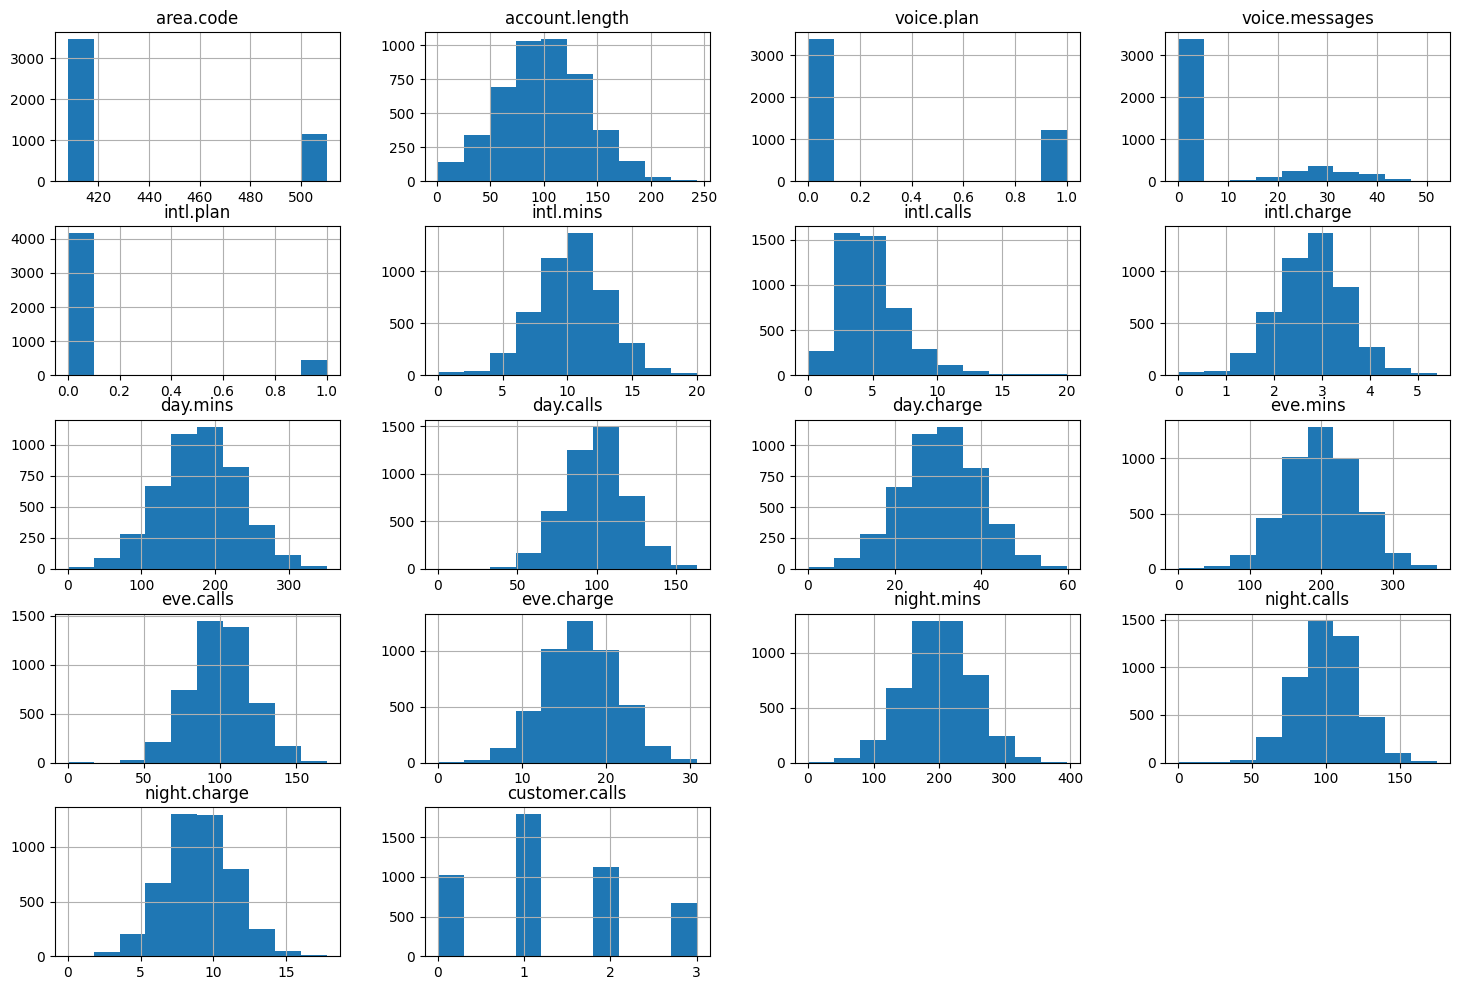

In [19]:
data.hist(figsize=(18,12))
plt.show

<Axes: >

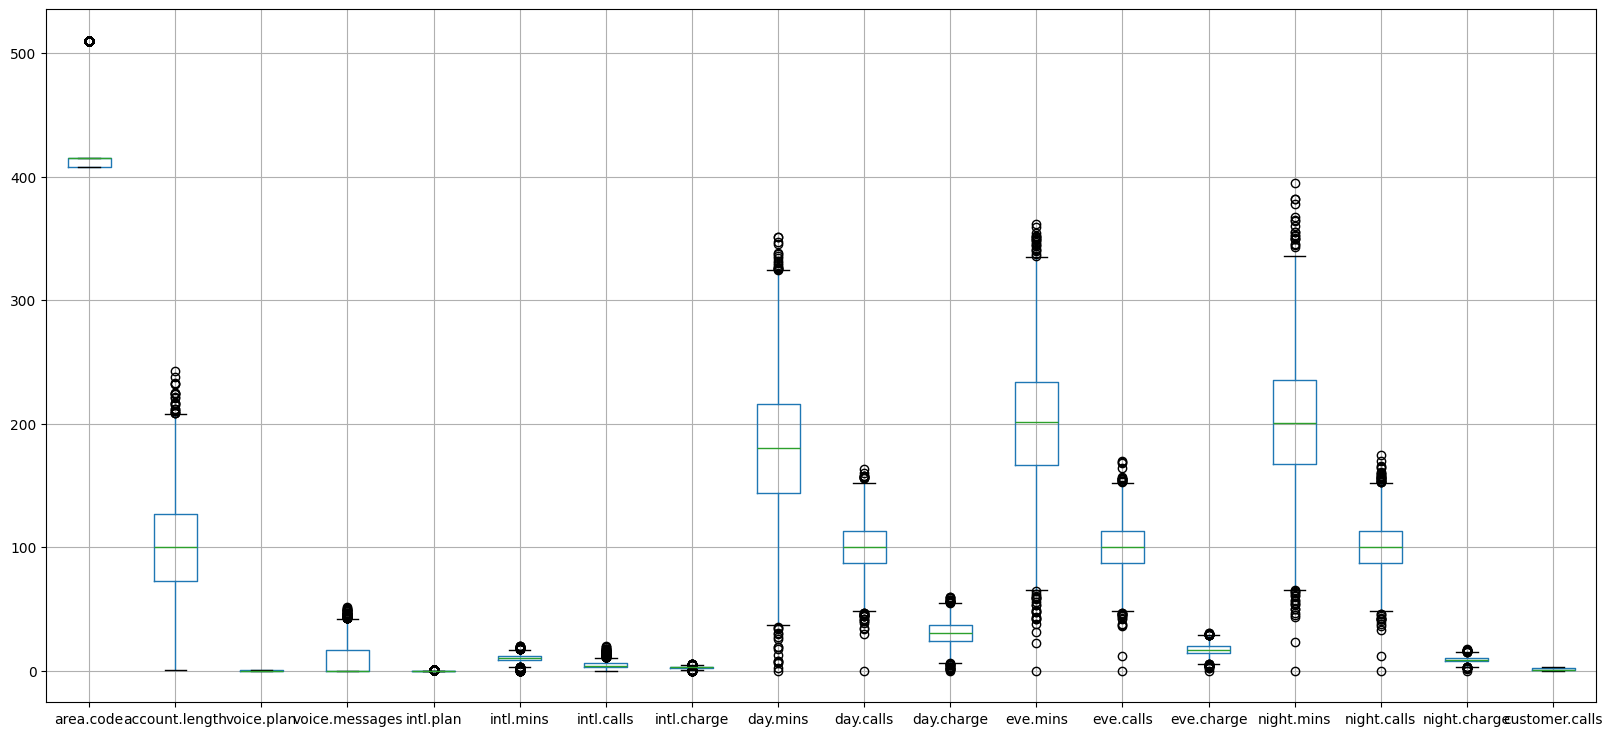

In [20]:
data.boxplot(figsize=(20,9))

array([[<Axes: title={'center': 'intl.mins'}>,
        <Axes: title={'center': 'intl.calls'}>]], dtype=object)

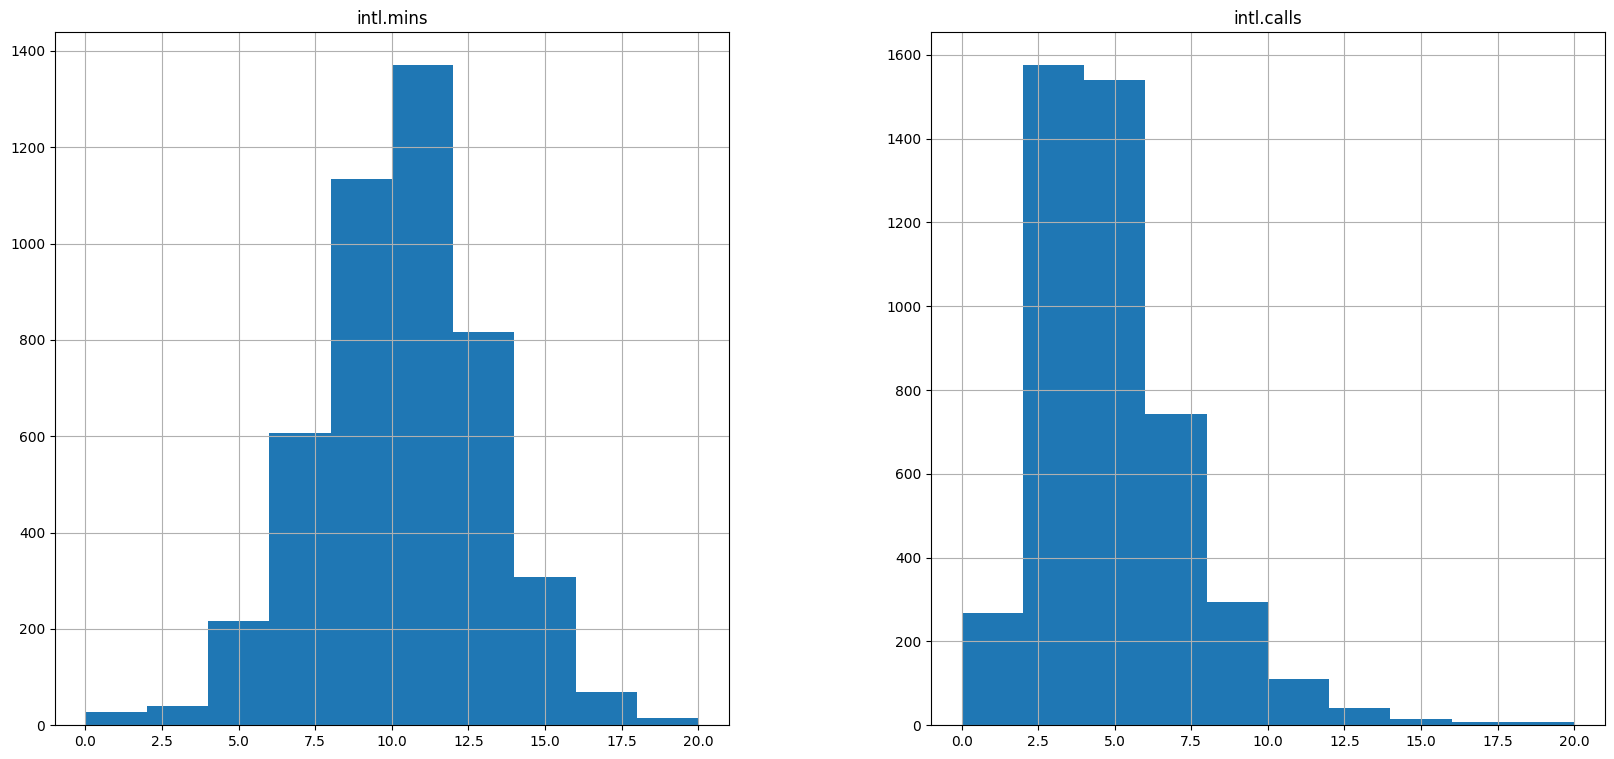

In [21]:
data.hist(['intl.mins','intl.calls'],figsize=(20,9),grid="none")

<Axes: xlabel='intl.calls', ylabel='Count'>

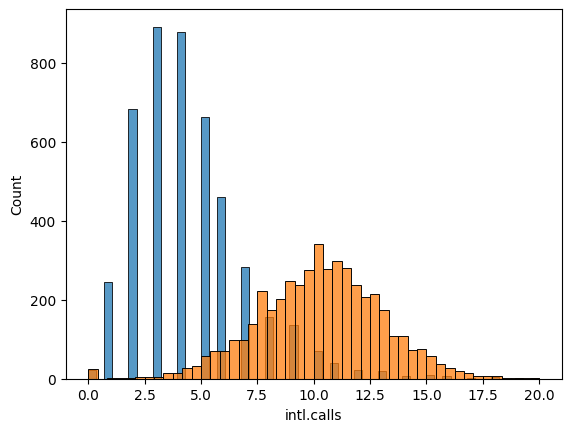

In [22]:
sns.histplot(data['intl.calls'])
sns.histplot(data['intl.mins'])

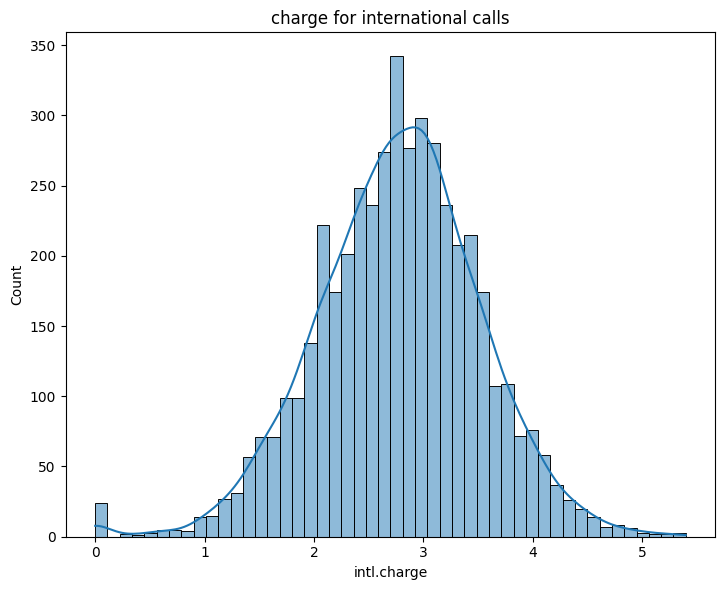

In [23]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.histplot(data['intl.charge'],kde=True,)
plt.title('charge for international calls')
plt.tight_layout()
plt.show()

In [24]:
numeric_data = data.select_dtypes(include=[float, int])

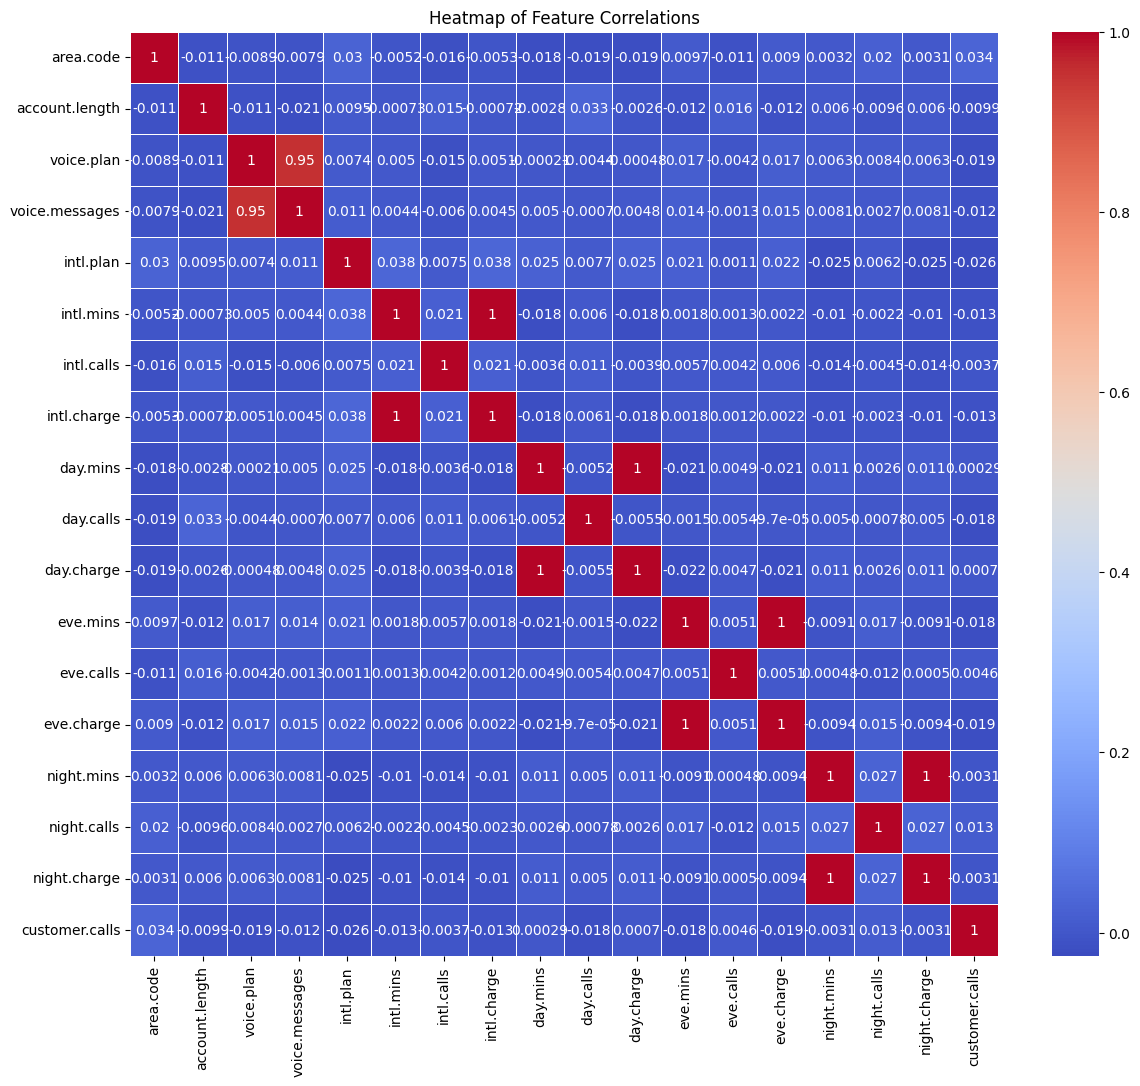

In [25]:
plt.figure(figsize=(14,12))
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Feature Correlations')
plt.show()


In [26]:
#sns.pairplot(data, hue='churn')
#plt.show()

In [27]:
data['churn'] = data['churn'].map({'no': 0, 'yes': 1}).astype(int)

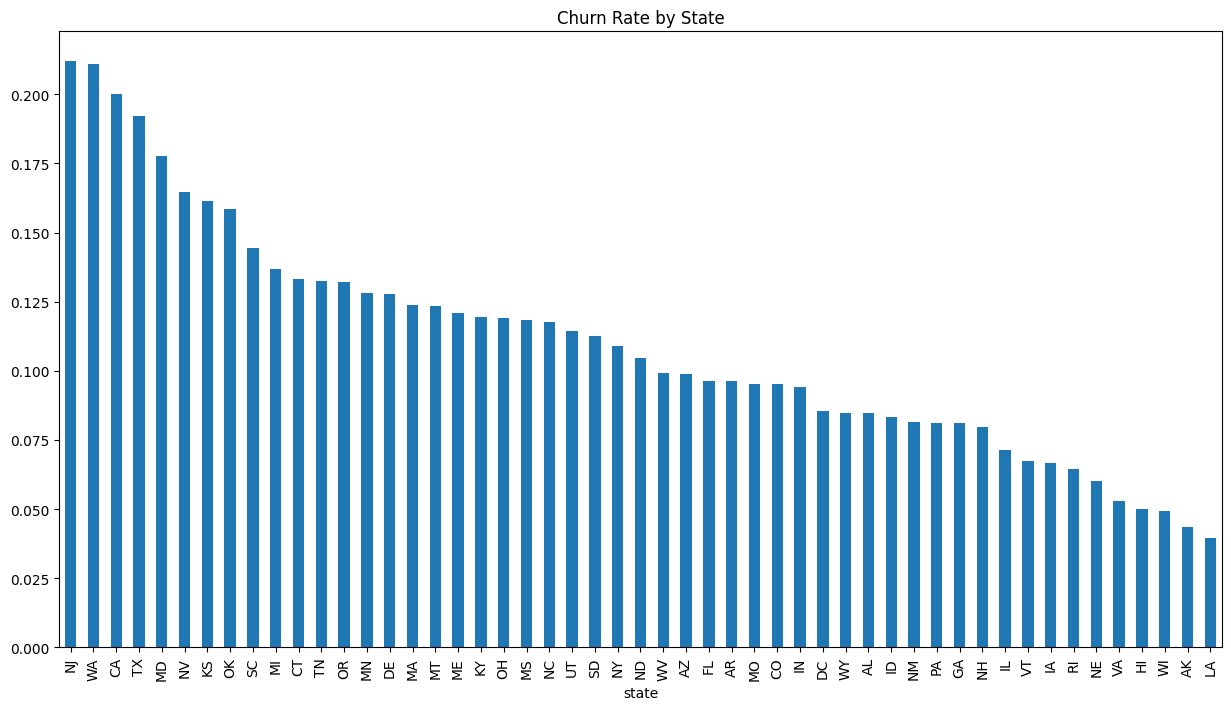

In [28]:
state_churn = data.groupby('state')['churn'].mean().sort_values(ascending=False)
plt.figure(figsize=(15,8))
state_churn.plot(kind='bar')
plt.title('Churn Rate by State')
plt.show()


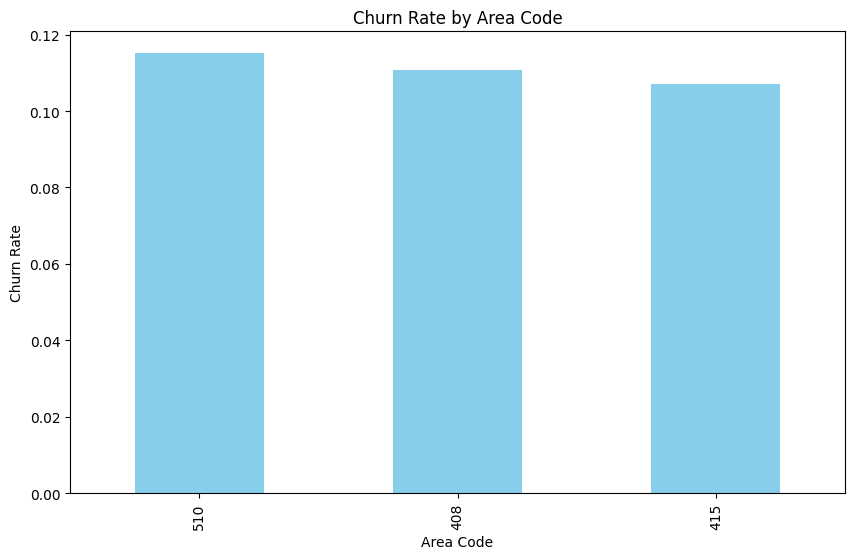

In [29]:
area_churn = data.groupby('area.code')['churn'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
area_churn.plot(kind='bar', color='skyblue')
plt.title('Churn Rate by Area Code')
plt.xlabel('Area Code')
plt.ylabel('Churn Rate')
plt.show()


Churn Rate by Voice Plan & Churn Rate by International Plan

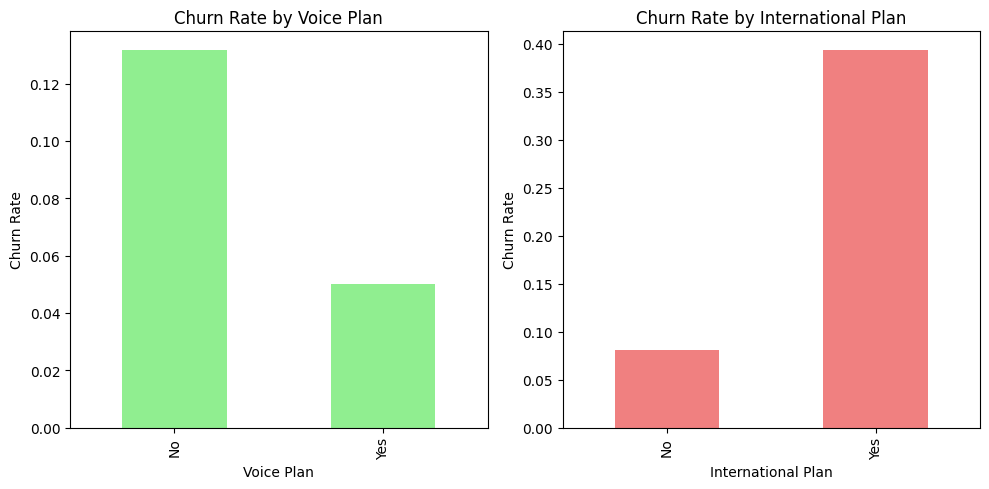

In [30]:

voice_churn = data.groupby('voice.plan')['churn'].mean()
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
voice_churn.plot(kind='bar', color='lightgreen')
plt.title('Churn Rate by Voice Plan')
plt.xlabel('Voice Plan')
plt.ylabel('Churn Rate')
plt.xticks([0, 1], ['No', 'Yes'])


intl_churn = data.groupby('intl.plan')['churn'].mean()
plt.subplot(1, 2, 2)
intl_churn.plot(kind='bar', color='lightcoral')
plt.title('Churn Rate by International Plan')
plt.xlabel('International Plan')
plt.ylabel('Churn Rate')
plt.xticks([0, 1], ['No', 'Yes'])

plt.tight_layout()
plt.show()


intl.mins vs intl.charge colored by intl.plan

In [31]:
intl_comparison = data.groupby('intl.plan').agg({'intl.mins': 'mean', 'intl.charge': 'mean'}).reset_index()

intl_comparison.rename(columns={'intl.mins': 'avg_intl_mins', 'intl.charge': 'avg_intl_charge'}, inplace=True)
print(intl_comparison)


   intl.plan  avg_intl_mins  avg_intl_charge
0          0      10.232286         2.763243
1          1      10.590509         2.859838


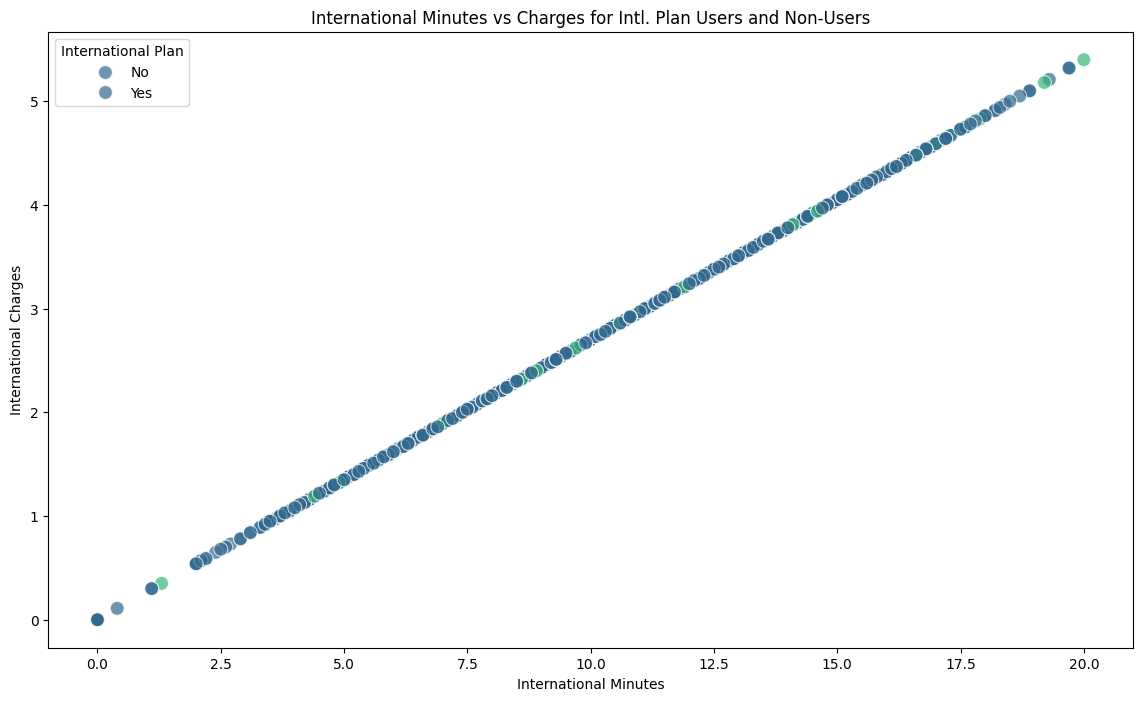

In [32]:
plt.figure(figsize=(14,8))

sns.scatterplot(x='intl.mins', y='intl.charge', hue='intl.plan', data=data, palette='viridis', s=100, alpha=0.7)
plt.title('International Minutes vs Charges for Intl. Plan Users and Non-Users')
plt.xlabel('International Minutes')
plt.ylabel('International Charges')
plt.legend(title='International Plan', loc='upper left', labels=['No', 'Yes'])
plt.show()


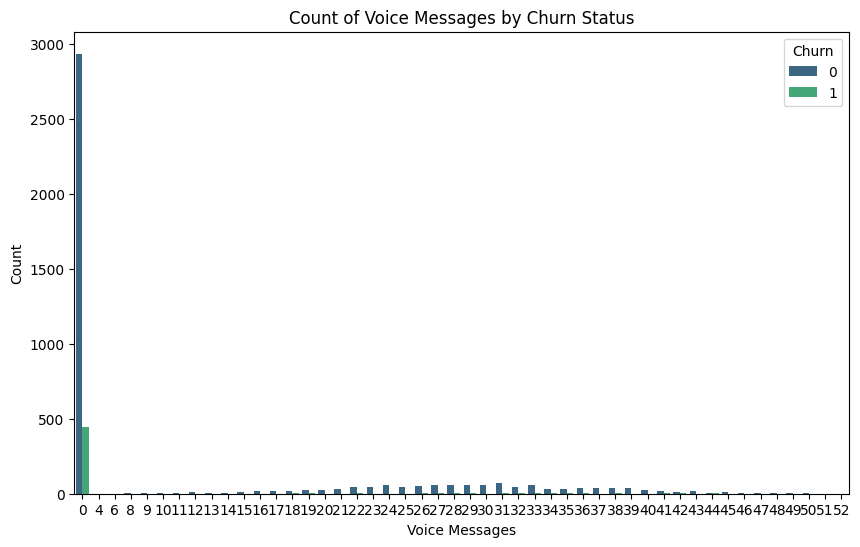

In [33]:

plt.figure(figsize=(10,6))
sns.countplot(x='voice.messages', hue='churn', data=data, palette='viridis')
plt.title('Count of Voice Messages by Churn Status')
plt.xlabel('Voice Messages')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()


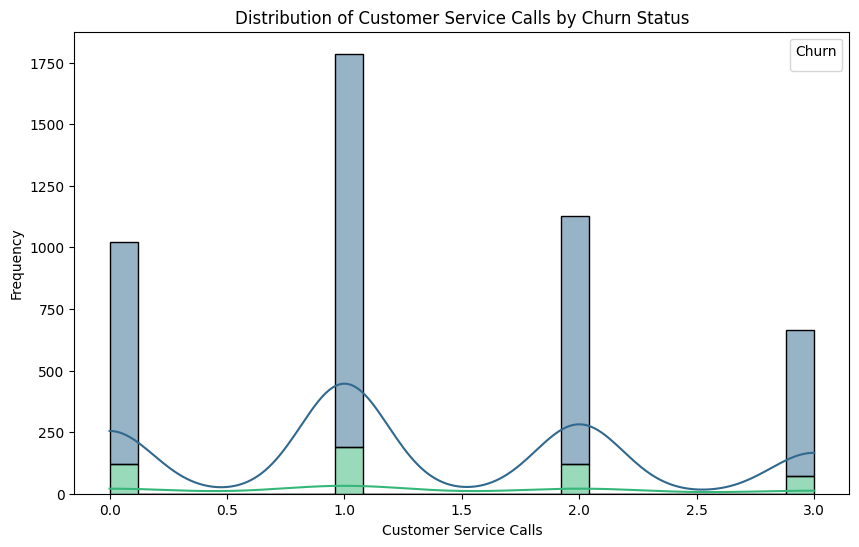

In [34]:
plt.figure(figsize=(10,6))
sns.histplot(data=data, x='customer.calls', hue='churn', multiple='stack', palette='viridis', kde=True)
plt.title('Distribution of Customer Service Calls by Churn Status')
plt.xlabel('Customer Service Calls')
plt.ylabel('Frequency')
plt.legend(title='Churn')
plt.show()

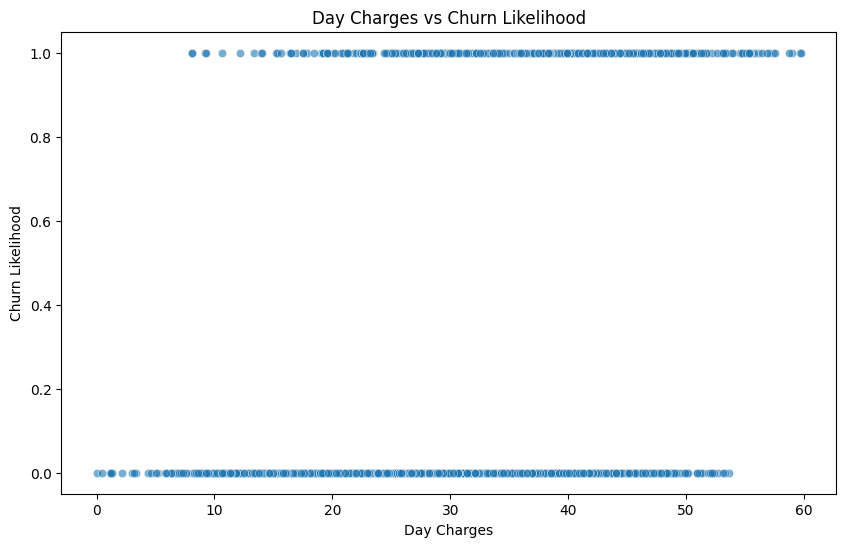

In [35]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='day.charge', y='churn', data=data, alpha=0.6)
plt.title('Day Charges vs Churn Likelihood')
plt.xlabel('Day Charges')
plt.ylabel('Churn Likelihood')
plt.show()


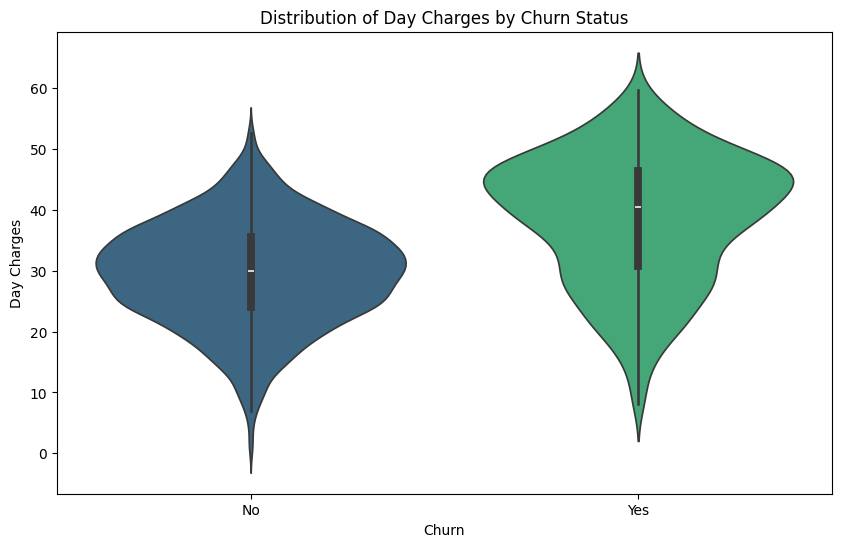

In [36]:
plt.figure(figsize=(10,6))
sns.violinplot(x='churn', y='day.charge', data=data, palette='viridis')
plt.title('Distribution of Day Charges by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Day Charges')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


#logistic regression model

In [37]:
#Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [38]:
label_encoder = LabelEncoder()
data['state'] = label_encoder.fit_transform(data['state'])

In [39]:
#data

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,16,415,128,1,25,0,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,0
1,35,415,107,1,26,0,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,0
2,31,415,137,0,0,0,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,0
3,35,408,84,0,0,1,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,0
4,36,415,75,0,0,1,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,11,408,50,1,40,0,9.9,5,2.67,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,2,0
4996,49,415,152,0,0,0,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,1
4997,7,415,61,0,0,0,13.6,4,3.67,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,1,0
4998,7,510,109,0,0,0,8.5,6,2.30,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,0,0


In [40]:
#One-hot encode categorical features: Some of your features like state and area.code might be categorical and need one-hot encoding. You can use pd.get_dummies() for this:

#X = pd.get_dummies(X, columns=['state', 'area.code'], drop_first=True)


In [41]:
#Prepare the data

#Define features (X) and target (y):


X = data.drop('churn', axis=1)  # Features
y = data['churn']  # Target variable

In [42]:
#Split data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

In [43]:
# 3. Create and train the model
model = LogisticRegression()  # You can adjust parameters like penalty, C, etc.
model.fit(X_train, y_train)

LogisticRegression()

In [44]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score # Import all necessary functions at once

#Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of class 1 (churn)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)  # y_pred_proba is the predicted probabilities

print(f"Accuracy: {accuracy: .2f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC AUC: {roc_auc}")

Accuracy:  0.88
Confusion Matrix:
[[795   5]
 [103  18]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       800
           1       0.78      0.15      0.25       121

    accuracy                           0.88       921
   macro avg       0.83      0.57      0.59       921
weighted avg       0.87      0.88      0.85       921

Precision: 0.782608695652174
Recall: 0.1487603305785124
F1-Score: 0.25
ROC AUC: 0.7822417355371901


In [45]:
from sklearn.metrics import mean_squared_error
# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 0.11726384364820847


In [46]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [47]:
#Get predicted probabilities:
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [48]:
#Calculate ROC curve values:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

In [49]:
#Calculate AUC (Area Under the Curve):
roc_auc = roc_auc_score(y_test, y_pred_prob)

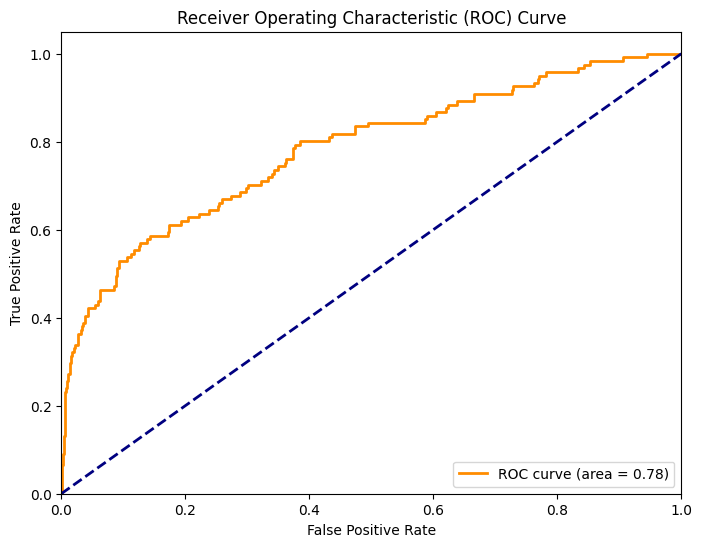

In [50]:
#Plot the ROC curve:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#logistic regression model with hyperparameters

In [51]:
#Get the Confusion Matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[795,   5],
       [103,  18]])

In [52]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model with specified hyperparameters
model2 = LogisticRegression(penalty='l1', C=0.1, solver='liblinear', max_iter=1000)

In [53]:
model2.fit(X_train, y_train)


LogisticRegression(C=0.1, max_iter=1000, penalty='l1', solver='liblinear')

In [54]:
#from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score # Import all necessary functions at once

#Make predictions and evaluate the model
y_pred2 = model2.predict(X_test)
y_pred_proba2 = model2.predict_proba(X_test)[:, 1]  # Probability of class 1 (churn)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred2)
conf_matrix = confusion_matrix(y_test, y_pred2)
class_report = classification_report(y_test, y_pred2)


precision = precision_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)
roc_auc = roc_auc_score(y_test, y_pred_proba2)  # y_pred_proba is the predicted probabilities

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC AUC: {roc_auc}")

Accuracy: 0.8859934853420195
Confusion Matrix:
[[792   8]
 [ 97  24]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       800
           1       0.75      0.20      0.31       121

    accuracy                           0.89       921
   macro avg       0.82      0.59      0.63       921
weighted avg       0.87      0.89      0.86       921

Precision: 0.75
Recall: 0.19834710743801653
F1-Score: 0.3137254901960784
ROC AUC: 0.8433264462809917


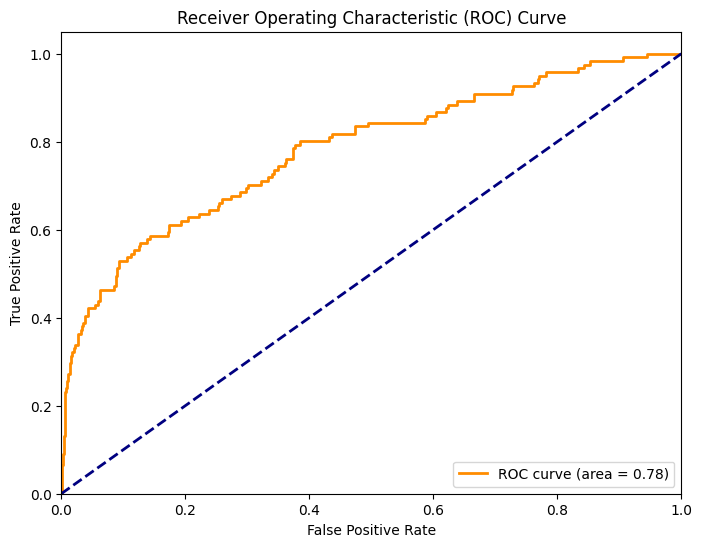

In [55]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you have already trained model2 and have X_test and y_test

# Get predicted probabilities
#y_pred_prob = model2.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       800
           1       0.78      0.15      0.25       121

    accuracy                           0.88       921
   macro avg       0.83      0.57      0.59       921
weighted avg       0.87      0.88      0.85       921



In [57]:
y_pred = model2.predict(X_test)

In [58]:
predictions_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
print(predictions_df.head())

      Actual  Predicted
4000       0          0
4799       0          0
2800       1          1
76         1          1
2006       0          0


In [59]:
predictions_df

,Actual,Predicted
4000,0,0
4799,0,0
2800,1,1
76,1,1
2006,0,0
...,...,...
1160,0,0
4729,0,0
3288,0,0
3754,1,0
